## Step 4: Analysis and Visualization
In this notebook I present the average monthly maps over the 23 years of study per climate variable, and the total average map of each climate variable. 

# Precipitation
Average monthly maps over the 23 years of study per climate variable

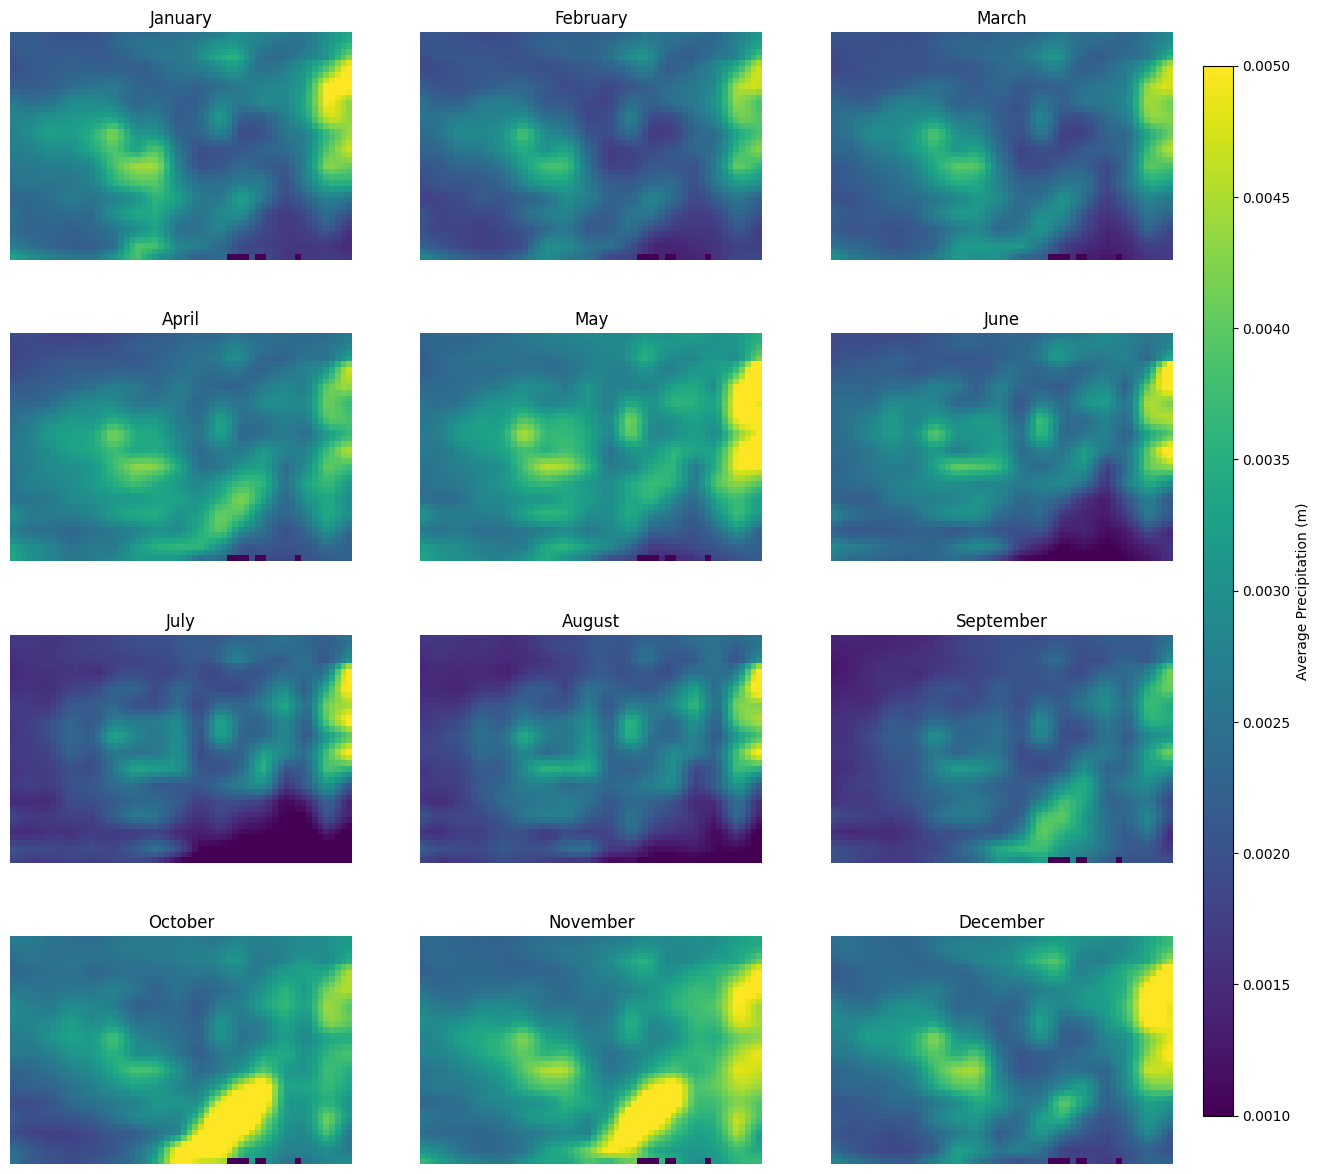

In [1]:
import os
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import calendar

# Directory where is the data of precipitation
tiff_file = '/home/user/Documentos/Candidaturas/ClimateFarmers/Analysis/data/precipitation.tif'

# Output directory to store the average monthly maps
output_dir = '/home/user/Documentos/Candidaturas/ClimateFarmers/Analysis/output/'
os.makedirs(output_dir, exist_ok=True)

# Opening TIFF file with Rasterio
with rasterio.open(tiff_file) as src:
    # To get the total number of bands ( they should be 276 = 12 meonths x 23 years)
    num_bands = src.count

    # Createing subplots (for visualization)
    fig, axs = plt.subplots(4, 3, figsize=(15, 15))
    
    # Loop thought the bands (months)
    for month in range(1, 13):  # 12 months
        # Get the name of the current month
        month_name = calendar.month_name[month]
        
        # Initializing a matrix to store the month currently being processed within the loop.
        monthly_data = None

        # Loop though the years
        for year in range(1, 24):  # 23 years
            # Reading the data of current band (current month)
            data = src.read((year - 1) * 12 + month)

            # Adding data on current year to the monthly matrix 
            if monthly_data is None:
                monthly_data = data
            else:
                monthly_data += data

        # COmputing average of precipitation for the current month
        monthly_avg = monthly_data / 23  # sum divided over the 23 years 

        # Creating name of output file
        output_file = os.path.join(output_dir, f'average_precipitation_month_{month}.tif')

        # Obtaining the profil of the source file 
        profile = src.profile

        # Writing the average monthly month in a new TIFF file
        with rasterio.open(output_file, 'w', **profile) as dst:
            dst.write(monthly_avg, 1)

        # Seting custom color scale limits
        vmin = 0.001  # Minimum value for the color scale
        vmax = 0.005  # Maximum value for the color scale

        # Visualizing the resulting map
        row = (month - 1) // 3
        col = (month - 1) % 3
        ax = axs[row, col]
        im = ax.imshow(monthly_avg, cmap='viridis', vmin=vmin, vmax=vmax)
        ax.set_title(f'{month_name}')
        ax.axis('off')

    # Adding a colorbar
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    cbar = fig.colorbar(im, cax=cbar_ax, label='Average Precipitation (m)') # meters according to documentation or ERA5-Land

    # Save the plot as a PDF
    #pdf_output_file = os.path.join(output_dir, 'average_precipitation_months.pdf')
    #plt.savefig(pdf_output_file, format='pdf', bbox_inches='tight')
    #plt.show()


## Analysis 
As expected during the summer season the precipitation in all the region decreases. It could be interesting to overlap the land cover maps in order to explain the regional distribution of precipitation. 

## Precipitation 
Average Precipitation allong the 23 years

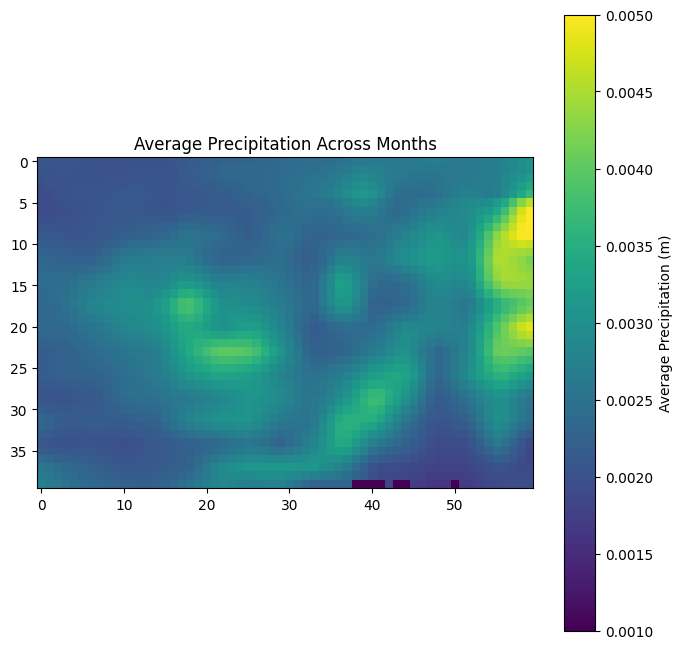

In [2]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Directory containing the monthly precipitation data
data_dir = '/home/user/Documentos/Candidaturas/ClimateFarmers/Analysis/output/'

# Output directory to store the result maps
output_dir = '/home/user/Documentos/Candidaturas/ClimateFarmers/Analysis/output/'
os.makedirs(output_dir, exist_ok=True)

# List of months (1 to 12)
months = range(1, 13)

# Initializing an array to store the average precipitation across months
average_precipitation = None

# Loop through months
for month in months:
    # Defining the file path for the current month's precipitation data
    file_path = os.path.join(data_dir, f'average_precipitation_month_{month}.tif')
    
    # Opening the data file using rasterio
    with rasterio.open(file_path) as dataset:
        # Reading the precipitation data for the current month
        precipitation_data = dataset.read(1)
        
        # Computes the mean value for the current month
        if average_precipitation is None:
            average_precipitation = precipitation_data
        else:
            average_precipitation += precipitation_data

# Computing the average precipitation across months
average_precipitation /= len(months)

# Createing an output file for the average precipitation data
output_file = os.path.join(output_dir, 'average_precipitation.tif')

# Defining the profile for the output file (I use the profile of any of the precipitation files, their profiles are the same)
with rasterio.open(os.path.join(data_dir, f'average_precipitation_month_1.tif')) as sample_dataset:
    profile = sample_dataset.profile

# Writing the average precipitation data to the output file
with rasterio.open(output_file, 'w', **profile) as dst:
    dst.write(average_precipitation, 1)

# Seting custom color scale limits
vmin = 0.001  # Minimum value for the color scale
vmax = 0.005  # Maximum value for the color scale

# Visualize and save the resulting map as a PDF
pdf_output_file = os.path.join(output_dir, 'average_precipitation.pdf')
plt.figure(figsize=(8, 8))
plt.imshow(average_precipitation, cmap='viridis', vmin=vmin, vmax=vmax)
plt.colorbar(label='Average Precipitation (m)')
plt.title('Average Precipitation Across Months')
plt.savefig(pdf_output_file, format='pdf')
plt.show()

# Soil temperature
the average monthly maps over the 23 years of study per climate variable

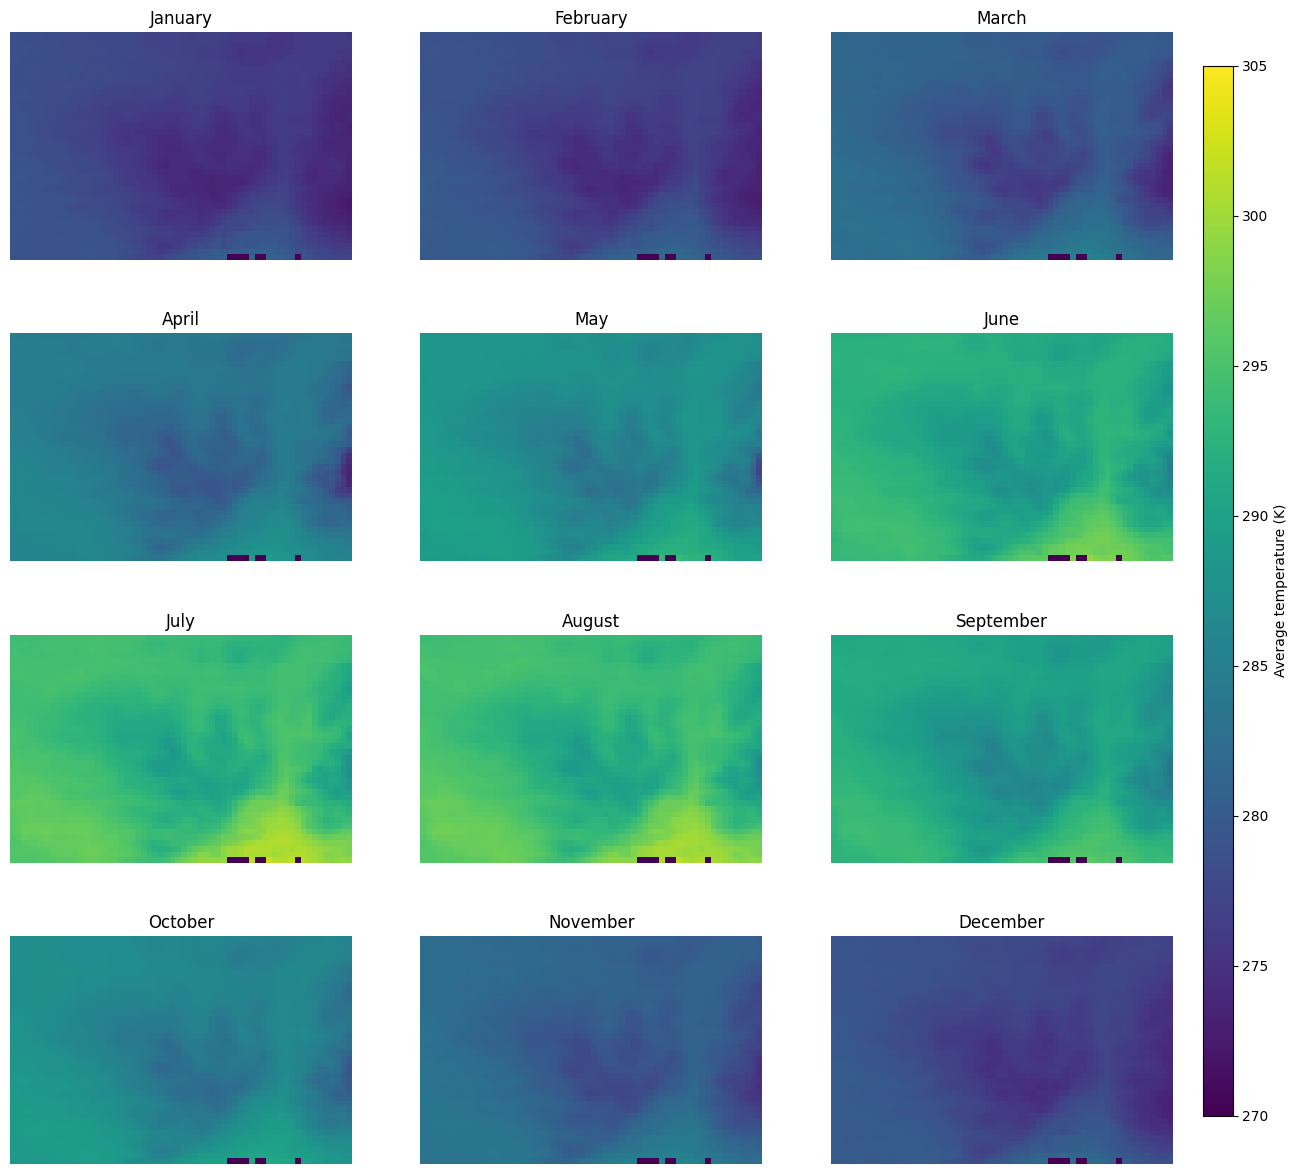

In [3]:
import os
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import calendar

# Directory where is the data of temperature
tiff_file = '/home/user/Documentos/Candidaturas/ClimateFarmers/Analysis/data/soil_temp_l1.tif'

# Output directory to store the average monthly maps
output_dir = '/home/user/Documentos/Candidaturas/ClimateFarmers/Analysis/output/'
os.makedirs(output_dir, exist_ok=True)

# Opening TIFF file with Rasterio
with rasterio.open(tiff_file) as src:
    # To get the total number of bands ( they should be 276 = 12 meonths x 23 years)
    num_bands = src.count

    # Creating subplots (for visualization)
    fig, axs = plt.subplots(4, 3, figsize=(15, 15))
    
    # Loop thought the bands (months)
    for month in range(1, 13):  # 12 months
        # Get the name of the current month
        month_name = calendar.month_name[month]
        
        # Initializing a matrix to store the month currently being processed within the loop.
        monthly_data = None

        # Loop though the years
        for year in range(1, 24):  # 23 years
            # Reading the data of current band (current month)
            data = src.read((year - 1) * 12 + month)

            # Adding data on current year to the monthly matrix 
            if monthly_data is None:
                monthly_data = data
            else:
                monthly_data += data

        # COmputing average of temperature for the current month
        monthly_avg = monthly_data / 23  # sum divided over the 23 years 

        # Creating name of output file
        output_file = os.path.join(output_dir, f'average_temperature_month_{month}.tif')

        # Obtaining the profil of the source file 
        profile = src.profile

        # Writing the average monthly month in a new TIFF file
        with rasterio.open(output_file, 'w', **profile) as dst:
            dst.write(monthly_avg, 1)

        # Seting custom color scale limits
        vmin = 270 # Minimum value for the color scale
        vmax = 305  # Maximum value for the color scale

        # Visualizing the resulting map
        row = (month - 1) // 3
        col = (month - 1) % 3
        ax = axs[row, col]
        im = ax.imshow(monthly_avg, cmap='viridis', vmin=vmin, vmax=vmax)
        ax.set_title(f'{month_name}')
        ax.axis('off')

    # Adding a colorbar
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    cbar = fig.colorbar(im, cax=cbar_ax, label='Average temperature (K)') # K according to documentation or ERA5-Land

    # Save the plot as a PDF
    #pdf_output_file = os.path.join(output_dir, 'average_temperature_months.pdf')
    #plt.savefig(pdf_output_file, format='pdf', bbox_inches='tight')
    #plt.show()


## Analysis 
I selected the soil temperature data at a depth of 0-7 cm below the surface as the primary focus of my study. However, since our interest lies in understanding changes in soil organic carbon (SOC), and the SOC data from SoilGrids encompasses the 0-30 cm depth range, it would be valuable to complement our analysis by examining soil temperature at a secondary depth level. Level 2, corresponding to the 7-28 cm depth range, can provide additional insights.

To explore potential correlations between land cover types and soil temperature, I suggest to overlay the land cover map onto the temperature data. 

At first glance, it seems that the agricultural surface has similar and intermediate temperatures between the temperature corresponding to forests and cities. 

## Temperature 
Average Temperature allong the 23 years

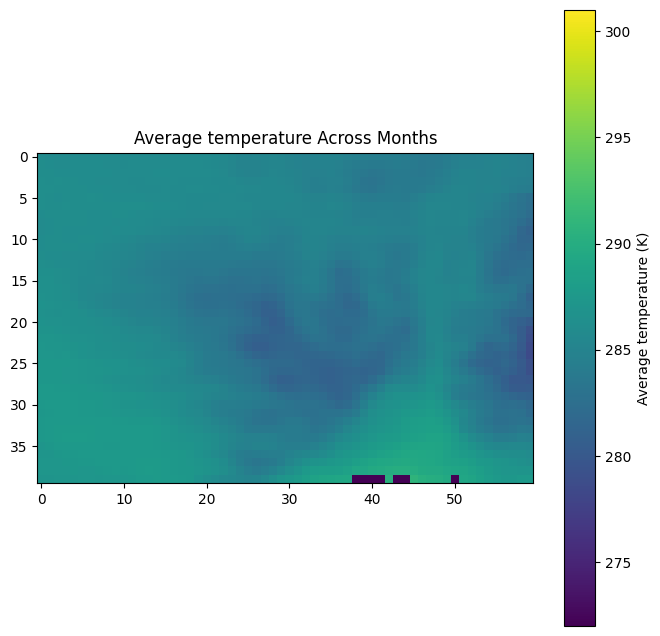

In [4]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Directory containing the monthly temperature data
data_dir = '/home/user/Documentos/Candidaturas/ClimateFarmers/Analysis/output/'

# Output directory to store the result maps
output_dir = '/home/user/Documentos/Candidaturas/ClimateFarmers/Analysis/output/'
os.makedirs(output_dir, exist_ok=True)

# List of months (1 to 12)
months = range(1, 13)

# Initializing an array to store the average temperature across months
average_temperature = None

# Loop through months
for month in months:
    # Defining the file path for the current month's temperature data
    file_path = os.path.join(data_dir, f'average_temperature_month_{month}.tif')
    
    # Opening the data file using rasterio
    with rasterio.open(file_path) as dataset:
        # Reading the temperature data for the current month
        temperature_data = dataset.read(1)
        
        # Computes the mean value for the current month
        if average_temperature is None:
            average_temperature = temperature_data
        else:
            average_temperature+= temperature_data

# Computing the average temperature across months
average_temperature /= len(months)

# Createing an output file for the average temperature data
output_file = os.path.join(output_dir, 'average_temperature.tif')

# Defining the profile for the output file (I use the profile of any of the temperature files, their profiles are the same)
with rasterio.open(os.path.join(data_dir, f'average_temperature_month_1.tif')) as sample_dataset:
    profile = sample_dataset.profile

# Writing the average temperature data to the output file
with rasterio.open(output_file, 'w', **profile) as dst:
    dst.write(average_temperature, 1)

# Seting custom color scale limits
vmin = 272  # Minimum value for the color scale
vmax = 301  # Maximum value for the color scale

# Visualize and save the resulting map as a PDF
pdf_output_file = os.path.join(output_dir, 'average_temperature.pdf')
plt.figure(figsize=(8, 8))
plt.imshow(average_temperature, cmap='viridis', vmin=vmin, vmax=vmax)
plt.colorbar(label='Average temperature (K)')
plt.title('Average temperature Across Months')
plt.savefig(pdf_output_file, format='pdf')
plt.show()

# Evapotranspiration
Average monthly maps over the 23 years of study per climate variable

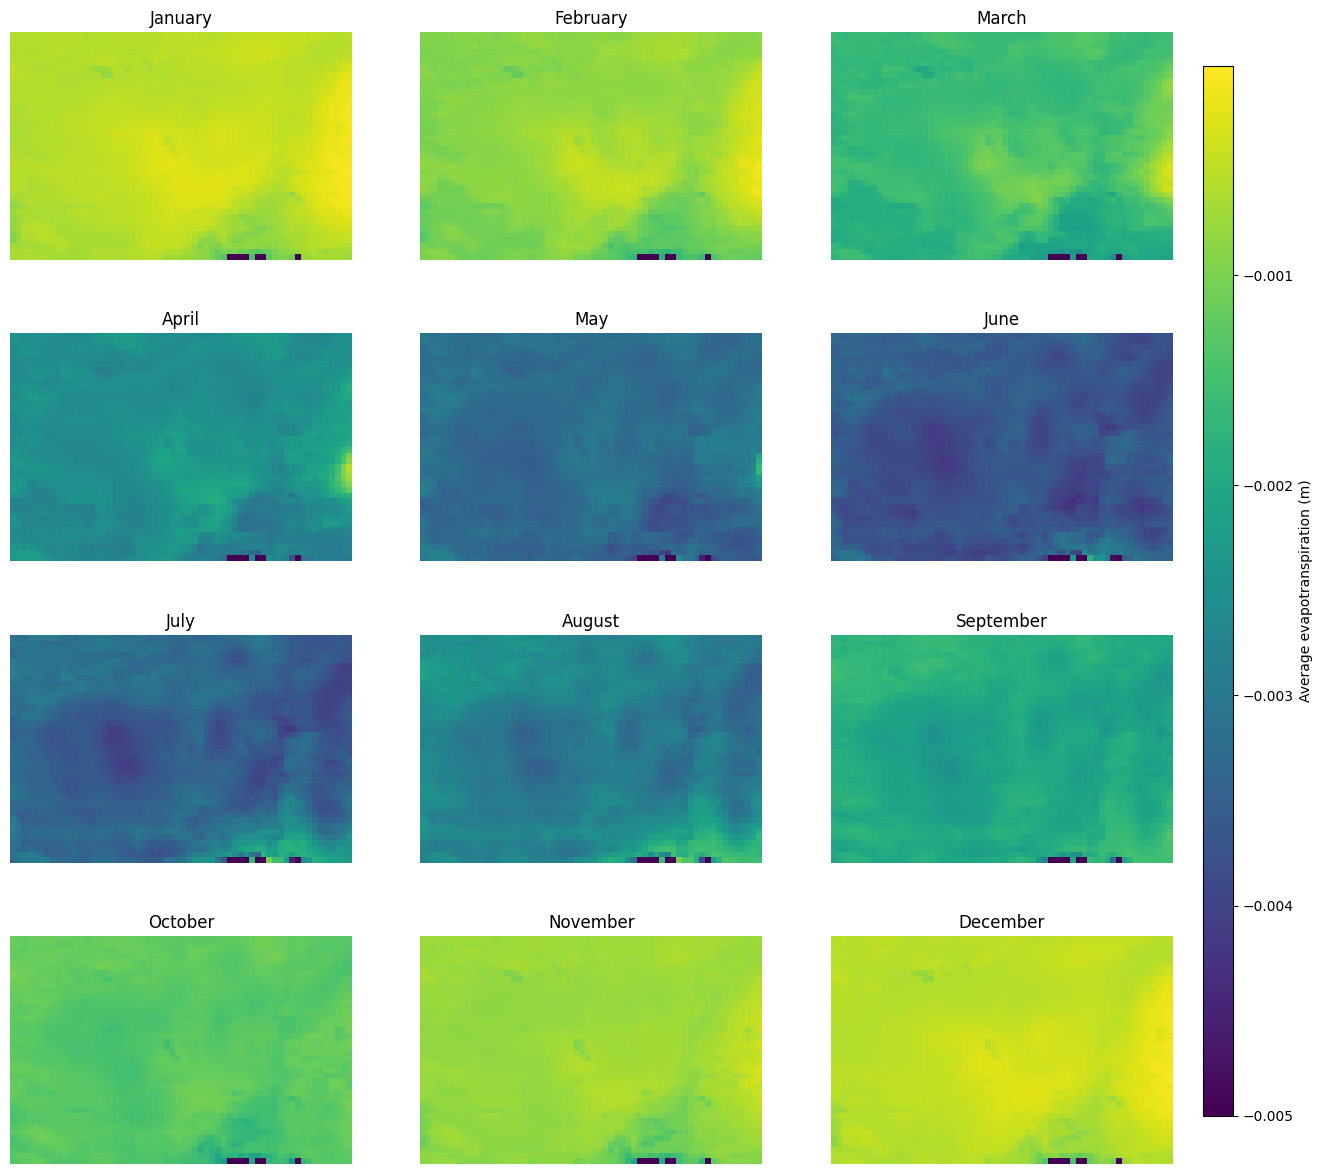

In [5]:
import os
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import calendar

# Directory where is the data of evapotranspiration
tiff_file = '/home/user/Documentos/Candidaturas/ClimateFarmers/Analysis/data/evapotranspiration.tif'

# Output directory to store the average monthly maps
output_dir = '/home/user/Documentos/Candidaturas/ClimateFarmers/Analysis/output/'
os.makedirs(output_dir, exist_ok=True)

# Opening TIFF file with Rasterio
with rasterio.open(tiff_file) as src:
    # To get the total number of bands ( they should be 276 = 12 meonths x 23 years)
    num_bands = src.count

    # Createing subplots (for visualization)
    fig, axs = plt.subplots(4, 3, figsize=(15, 15))
    
    # Loop thought the bands (months)
    for month in range(1, 13):  # 12 months
        # Get the name of the current month
        month_name = calendar.month_name[month]
        
        # Initializing a matrix to store the month currently being processed within the loop.
        monthly_data = None

        # Loop though the years
        for year in range(1, 24):  # 23 years
            # Reading the data of current band (current month)
            data = src.read((year - 1) * 12 + month)

            # Adding data on current year to the monthly matrix 
            if monthly_data is None:
                monthly_data = data
            else:
                monthly_data += data

        # COmputing average of evapotranspiration for the current month
        monthly_avg = monthly_data / 23  # sum divided over the 23 years 

        # Creating name of output file
        output_file = os.path.join(output_dir, f'average_evapotranspiration_month_{month}.tif')

        # Obtaining the profil of the source file 
        profile = src.profile

        # Writing the average monthly month in a new TIFF file
        with rasterio.open(output_file, 'w', **profile) as dst:
            dst.write(monthly_avg, 1)

        # Seting custom color scale limits
        vmin = -0.005  # Minimum value for the color scale
        vmax = -0.000001 # Maximum value for the color scale

        # Visualizing the resulting map
        row = (month - 1) // 3
        col = (month - 1) % 3
        ax = axs[row, col]
        im = ax.imshow(monthly_avg, cmap='viridis', vmin=vmin, vmax=vmax)
        ax.set_title(f'{month_name}')
        ax.axis('off')

    # Adding a colorbar
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    cbar = fig.colorbar(im, cax=cbar_ax, label='Average evapotranspiration (m)') # meters according to documentation or ERA5-Land

    # Save the plot as a PDF
    #pdf_output_file = os.path.join(output_dir, 'average_evapotranspiration_months.pdf')
    #plt.savefig(pdf_output_file, format='pdf', bbox_inches='tight')
    #plt.show()


## Analysis 
As expected the evapotranspiration is more negative during the summer months. I suggest to overlap the land cover map, and may be play a little more with the scale. In order to see a more accurate correlation.  

## Evapotranspiration 
Average Evapotranspiration allong the 23 years

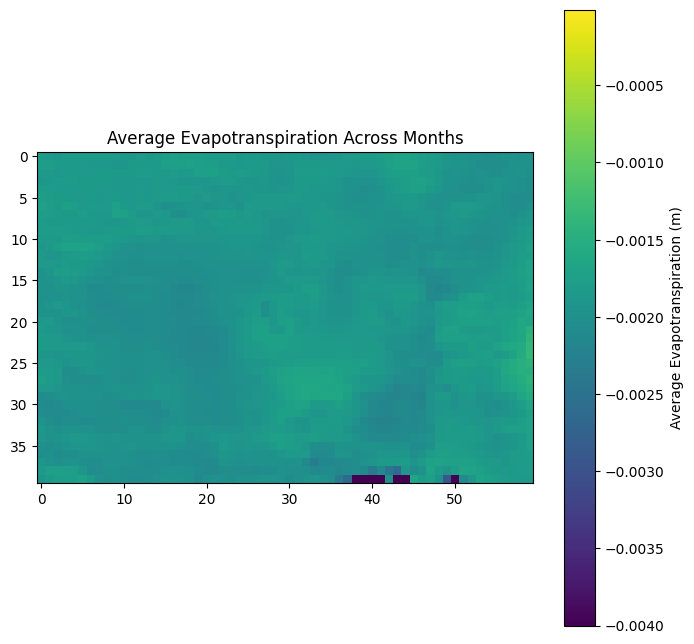

In [6]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Directory containing the monthly Evapotranspiration data
data_dir = '/home/user/Documentos/Candidaturas/ClimateFarmers/Analysis/output/'

# Output directory to store the result maps
output_dir = '/home/user/Documentos/Candidaturas/ClimateFarmers/Analysis/output/'
os.makedirs(output_dir, exist_ok=True)

# List of months (1 to 12)
months = range(1, 13)

# Initializing an array to store the average Evapotranspiration across months
average_evapotranspiration = None

# Loop through months
for month in months:
    # Defining the file path for the current month's Evapotranspiration data
    file_path = os.path.join(data_dir, f'average_evapotranspiration_month_{month}.tif')
    
    # Opening the data file using rasterio
    with rasterio.open(file_path) as dataset:
        # Reading the Evapotranspiration data for the current month
        evapotranspiration_data = dataset.read(1)
        
        # Computes the mean value for the current month
        if average_evapotranspiration is None:
            average_evapotranspiration = evapotranspiration_data
        else:
            average_evapotranspiration += evapotranspiration_data

# Computing the average Evapotranspiration across months
average_evapotranspiration /= len(months)

# Createing an output file for the average Evapotranspiration data
output_file = os.path.join(output_dir, 'average_evapotranspiration.tif')

# Defining the profile for the output file (I use the profile of any of the Evapotranspiration files, their profiles are the same)
with rasterio.open(os.path.join(data_dir, f'average_evapotranspiration_month_1.tif')) as sample_dataset:
    profile = sample_dataset.profile

# Writing the average Evapotranspiration data to the output file
with rasterio.open(output_file, 'w', **profile) as dst:
    dst.write(average_evapotranspiration, 1)

# Seting custom color scale limits
    vmin = -0.004  # Minimum value for the color scale
    vmax = -0.00001 # Maximum value for the color scale

# Visualize and save the resulting map as a PDF
pdf_output_file = os.path.join(output_dir, 'average_evapotranspiration.pdf')
plt.figure(figsize=(8, 8))
plt.imshow(average_evapotranspiration, cmap='viridis', vmin=vmin, vmax=vmax)
plt.colorbar(label='Average Evapotranspiration (m)')
plt.title('Average Evapotranspiration Across Months')
plt.savefig(pdf_output_file, format='pdf')
plt.show()